# 3주차 학습 목표
 - 주성분 분석과 요인분석 (2주차 F/U)
 - 지도학습 이해
 - 선형성에 대한 이해 및 통계량
 - 회귀분석 주요 개념 이해
 - 회귀분석 실습: sklearn VS statmodels
 - 로지스틱 회귀분석 이해 및 실습
---
변수를 가지고 새로운걸 만드는게 주성분 분석  
내가 모르는 숨겨진 요인을 찾아서 분석하는게 요인 분석

변수들의 선형선을 이용한다(상관관계, 공분산 등) / corr cov  
변수의 이름은 달라도 선형성이 같다면 같은 변수라고 볼 수 있다.

so, 변수들의 관계가 linear한가.

주성분의 경우 첫번째 주성분이 가장 많은 설명이 가능하도록 만들고,  
이전 변수와 corr이 없도록 한다.(선형 독립)

---
지도학습  
데이터를 가지고, 값을 예측한다.
 - 값: 수치(양적변수), 범주(질적변수)  
  
지도학습의 값에는 설명변수(들)과 target변수(대부분 1개)가 있다  
- target 변수 == y변수, 종속 변수, output
- 설명 변수 == x변수, 독립 변수, input, feature

지도학습엔 target이 무조건 있어야하고, 정형 데이터가 있어야한다.  
개념적으로는 target은 하나.

숫자 예측 - 회기(Regression)  
범주 예측 - 분류(Classification)
  
파티셔닝을 통해서 분석 데이터를 두개로 나눈다.  
학습자료 = training set  
검증자료 = testing set  

MSE(mean squared error) - 오차의 제곱을 평균낸 값 측정  
RMSE(rooted mean squared error) - MSE를 ROOT씌운 것  
-> 두개로 오차를 검증하면 해당 수치가 높은지 낮은지 모른다.  
 그래서 원래의 값과, 출력된 값의 퍼센티지를 나타내는 방식이 MAPE  
 
trainning set으로 만든 회기모형 출력과
testing set의 회기모형 출력의 오차를 검증한다.

예측이 높아지면 설명이 낮아지고
설명이 높아지면 예측이 낮아진다. 
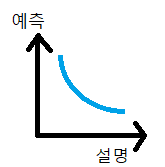
 

#1. 선형성 이해 

선형성 - 두변수가 있을 때 한변수의 증감에 따라 다른 한 변수의 증감이 있는 형태

A 2 1 0 1 2  
B 2 3 4 5 6  
-> A의 증감에 따라 B가 함께 가지않음 == 선형적이지않음  
 단, 전체적으로 통계량을 봤을 때로 생각해야함

== 공분산, 상관관계(~1 - 1 사이에 두변수의 선형관계인지 맞다면 얼마나 맞는지)  
A, B의 corr이 0.9다.  
-> A가 증가함에 따라 B도 증가한다   
하지만, A로 인해 변하는 건지는 모름(인과관계를 모른다.)

통계적 가설검정(p-value < 유의수준이라면 대립가설을 택하자.)이 회기에도 들어간다.  

ex)  
우리 회사와 경쟁사의 매출액 비교
corr 0.7일 때 p-value가 나올것이다.  
h0: 0  
h1 <> 0  
-> p-value가 0.01~ 0.05라면 우리회사 매출이 늘면 경쟁사도 늘어난다 볼 수 있다.

0. 데이터 읽기

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp

data = pd.read_csv("creditset2.csv")


1. 공분산

In [ ]:
import numpy as np
import scipy as sp

A=data.age
B=data.income

print(sp.cov(A,B))   #공분산

[[ 1.75892573e+02 -6.64700713e+03]
 [-6.64700713e+03  2.05243649e+08]]


<ipython-input-2-8225b8473483>:7: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  print(sp.cov(A,B))   #공분산


2. 상관관계

In [ ]:
import numpy as np
from scipy import stats

A=data.age
B=data.income
C=data.loan

print(stats.pearsonr(A,B))   #상관관계
print(stats.pearsonr(A,C))   #상관관계


PearsonRResult(statistic=-0.03498384417456003, pvalue=0.11781153401973968)
PearsonRResult(statistic=0.006561002944344477, pvalue=0.769341242097694)


3. Paired T-test

In [ ]:
from scipy import stats 
before_ad = [100, 110, 105, 115, 100, 90]
after_ad = [140, 130, 115, 125, 110, 110]

tTestResult= stats.ttest_rel(before_ad, after_ad)
print(tTestResult)

TtestResult(statistic=-3.8413666267326794, pvalue=0.012106854691433334, df=5)


4. 분산분석과 다중비교

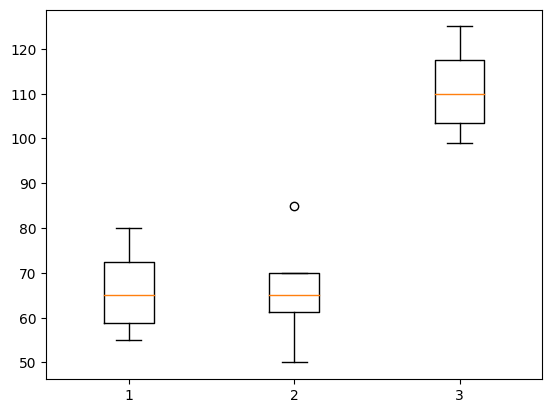

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1 = [60, 70, 80, 55]
group2 = [50, 65, 85, 65]
group3 = [105, 115, 99, 125]
plot_data = [group1, group2, group3]

ax = plt.boxplot(plot_data)
plt.show()


In [ ]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=17.419898513954344, pvalue=0.0008047905831477702)

In [ ]:
values = [60, 70, 80, 55 ,50, 65, 85, 65, 105, 115, 99, 125]
group = [1,1,1,1,2,2,2,2,3,3,3,3]

tukey = pairwise_tukeyhsd(endog=values,     # Data
                          groups=group,   # Groups
                          alpha=0.05)          # Significance level
tukey.summary()              # See test summary


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.0,1.0,-24.4422,24.4422,False
1,3,44.75,0.0016,20.3078,69.1922,True
2,3,44.75,0.0016,20.3078,69.1922,True


5. scipy 이용 선형회귀분석

In [ ]:
import pandas as pd
df = pd.read_csv("adv.csv")
df.columns
# 광고에 따른 매출액으로 가정을 했다.
# 다만, 매출이 높아져서 광고를 한건지,
# 광고를 해서 매출이 올랐는지는 판단에 따라 달라짐.  
X=df.TV
Y=df.sales

In [ ]:
df[ ["TV", "sales"]]

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [ ]:
from scipy import stats
model1 = stats.linregress( X,Y) #linear regression
model1

#slope 기울기 == 0.047...
#intercept y절편 == 7.03...
#pvalue가 0에 가까움 == 유의하다.

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703, intercept_stderr=0.4578429402734785)

In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
df[ ["TV"]  ].shape


(200, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
line_fitter = LinearRegression().fit(df[["TV","radio","newspaper"]], df.sales)
print( line_fitter.coef_ )
line_fitter.intercept_
#sklearn은 p-value가 없다.

# xs간의 corr이 높으면 한개의 x만
# 주성분분석 결과를 쓸 수 있다.
# 다중공선성 == corr이 높은경우 조심

- bostionhousing을 읽어서 medv가 target, 회기 모형 만들기.
- train, test로 나눠서 train의 직선식을 찾아라.
- 주성분 분석으로 회기분석 하기

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

bh = pd.read_csv("BostonHousing.csv")

bh_X_train, bh_X_test, bh_Y_train, bh_Y_test = train_test_split(bh.drop('medv', axis=1), bh['medv'], test_size=0.2, random_state=0)

#아래의 값에서 medv와 상관있고, 나머지랑은 크게 상관없어보이는거 찾기["rm", "chas"]
bh_X_train.corr()
#sns.heatmap(bh.corr(), cmap="Blues") 


bh_f = LinearRegression().fit(bh_X_train[["rm", "chas"]], bh_Y_train)
bh_f.coef_
bh_f.score(bh_X_train[["rm", "chas"]], bh_Y_train) #결정계수
pred = bh_f.predict(bh_X_test[["rm", "chas"]]) #예측 값

np.mean((bh_Y_test - pred)**2)

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
#RMSE
print( np.sqrt(mean_squared_error(pred, bh_Y_test)))

#MAPE
print( mean_absolute_percentage_error(pred, bh_Y_test) ) 

from sklearn.ensemble import RandomForestRegressor
rf_f = RandomForestRegressor().fit(bh_X_train[["rm", "chas"]], bh_Y_train)
rf_f

from sklearn.preprocessing import StandardScaler
s = StandardScaler().fit(bh_X_train)
X_train_scaled = pd.DataFrame(s.transform(bh_X_train), columns = bh_X_train.columns)

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)
col = ['PC'+str(i+1) for i in range(0,13)]

X_train_scaled_pca = pd.DataFrame( pca.transform(X_train_scaled, columns=bh_X_train.columns))

6.7214081314389
1.7019489377684496


- TV, radio, newspaper를 X변수, sales가 Y가 되게 해서 선형회귀...해석....

In [ ]:
#df에 scaling을 적용해보세요, StandardScaler를 사용하세요
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame( StandardScaler().fit_transform(df), columns=df.columns)
train, test = train_test_split( df, test_size=0.2)
model = LinearRegression().fit( train.drop(['sales', 'Unnamed: 0'], axis=1), 
                               train.sales)
#X변수: TV, radio, newspaper, Y변수: sales
#model.coef_, model.intercept_
pred = model.predict( test[["TV", "radio", "newspaper"]])
import numpy as np
np.mean(   (pred - test.sales)**2  )  #Mean Squared Error
np.sqrt( np.mean(   (pred - test.sales)**2  ) ) #Rooted Mean Squared Error

0.3169278737893349

- imputing+scaling+partitioning+regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = df.iloc[:, 1:5]

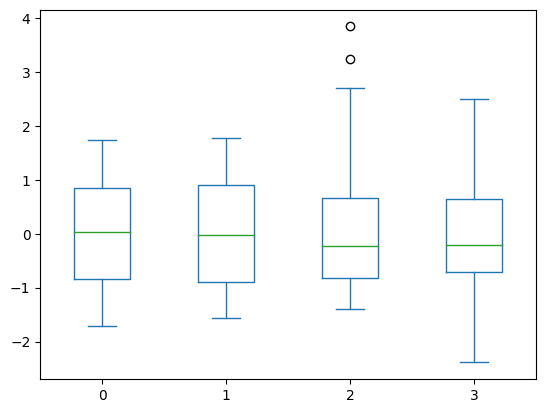

In [ ]:
imputer = SimpleImputer(strategy='mean')  
imputer.fit(df) 
df3_imputed = imputer.transform(df) 
df3_imputed_df = pd.DataFrame( df3_imputed )
df3_imputed_df.plot.box()
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3_imputed)
train, test = train_test_split( df3_scaled, test_size=0.3)

In [ ]:
train_df = pd.DataFrame( train, columns = df.columns)
test_df = pd.DataFrame( test, columns = df.columns)

In [ ]:
train_df.drop('sales', axis=1) #inplace=True

,TV,radio,newspaper
0,-1.133153,-0.787595,-0.559471
1,1.334171,1.312388,1.111484
2,-1.423908,0.164487,0.586721
3,0.666253,0.650657,0.711007
4,0.216694,-0.895633,-0.596296
...,...,...,...
135,0.790028,0.049697,-1.222329
136,0.544814,0.819466,2.073549
137,1.594565,1.265121,1.640850
138,0.834400,-1.206241,-0.145184


In [ ]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(train_df.drop('sales', axis=1), train_df.sales)

LinearRegression()

In [ ]:
y_predicted = line_fitter.predict(test_df.drop('sales', axis=1))

In [ ]:
np.mean( (y_predicted-test_df.sales)**2 )

0.09152906140165959

# 2. 선형회귀분석 연습
- Boston 집값 데이터 

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]



In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(data)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(features, target, test_size=0.3)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print(regr.score(X_train, Y_train))	#R^2, 결정계수
print(np.mean( np.square( regr.predict(X_test) - Y_test ) ))  #MSE
print(regr.predict(X_test[1,].reshape(1,13)))

0.7039431842105301
19.433914111585963
[12.89972169]


In [ ]:
#boston 데이터셋 중에서 CRIM, RM, TAX 변수를 X로 회귀분석
#y는 dataset['target']을 사용
# MinMaxScaling, 8:2 Partitioning, LinearRegression
# Test셋에 대한 RMSE를 구하기
X =data[:, [0, 5, 9]]
y = target

from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform( X )

X_train, X_test, y_train, y_test =train_test_split( scaled, y, 
                                                   test_size=0.2)
#.....

- 연습2: 가스 생산량 예측
- 변수 설명 
 - Well : well index
 - Por : well average porosity (%)
 - Perm : permeability (mD)
 - AI : accoustic impedance (kg/m2s*10^6)
 - Brittle : brittleness ratio (%)
 - TOC : total organic carbon (%)
 - VR : vitrinite reflectance (%)
 - Prod : gas production per day (MCFD) - Response Variable

In [ ]:
#unconv_MV_v5를 읽어서 unputing 확인, scaling, corr확인, partitioning
#train으로 선형회기모형 만들기.

#test로 예측해서 mse 출력
import pandas as pd
import numpy as np

df = pd.read_csv('unconv_MV_v5.csv')
#결측치 없어서 스케일링 불필요
print("결측치 - \n", df.isnull().mean())

#prod랑 비교했을 때 좋은 값(por, perm, toc)
print("corr - \n", df.corr())

#X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Prod', axis=1), df['Prod'], test_size=0.3, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(df[['Por', 'Perm', 'TOC']], df['Prod'], test_size=0.2, random_state=0)

from sklearn import linear_model
regr = linear_model.LinearRegression()
model = regr.fit(X_train, Y_train)

pred = model.predict(X_test)
print("prod - \n", pred)
print("\n\n\n", np.mean( ( pred - Y_test )**2 ))  #MSE

결측치 - 
 Well       0.0
Por        0.0
Perm       0.0
AI         0.0
Brittle    0.0
TOC        0.0
VR         0.0
Prod       0.0
dtype: float64
corr - 
              Well       Por      Perm        AI   Brittle       TOC        VR  \
Well     1.000000  0.068927  0.077928  0.041483 -0.079252  0.022624 -0.007279   
Por      0.068927  1.000000  0.760546 -0.461549 -0.218570  0.711831  0.111860   
Perm     0.077928  0.760546  1.000000 -0.239636 -0.124017  0.471746  0.051023   
AI       0.041483 -0.461549 -0.239636  1.000000  0.127599 -0.531864  0.499143   
Brittle -0.079252 -0.218570 -0.124017  0.127599  1.000000 -0.214282  0.317929   
TOC      0.022624  0.711831  0.471746 -0.531864 -0.214282  1.000000  0.299483   
VR      -0.007279  0.111860  0.051023  0.499143  0.317929  0.299483  1.000000   
Prod     0.026817  0.861910  0.727426 -0.390835  0.237155  0.654445  0.323182   

             Prod  
Well     0.026817  
Por      0.861910  
Perm     0.727426  
AI      -0.390835  
Brittle  0.237155 

In [ ]:
import pandas as pd
from sklearn import linear_model
import numpy as np

df = pd.read_csv('unconv_MV_v5.csv')

df.Por.shape #1차원임.

df.Por.values.reshape(200,1) #2차원으로 변경

array([[12.08],
       [12.38],
       [14.02],
       [17.67],
       [17.52],
       [14.53],
       [13.49],
       [11.58],
       [12.52],
       [13.25],
       [15.04],
       [16.19],
       [16.82],
       [17.39],
       [13.83],
       [11.34],
       [19.55],
       [15.58],
       [14.73],
       [12.47],
       [18.08],
       [16.32],
       [12.62],
       [10.03],
       [18.66],
       [ 7.27],
       [15.78],
       [15.73],
       [12.38],
       [12.89],
       [18.48],
       [14.74],
       [12.55],
       [13.58],
       [11.76],
       [11.98],
       [13.56],
       [16.55],
       [15.22],
       [14.54],
       [14.37],
       [15.4 ],
       [10.14],
       [11.09],
       [18.37],
       [14.71],
       [ 9.29],
       [11.85],
       [18.59],
       [18.18],
       [18.72],
       [20.96],
       [15.31],
       [11.98],
       [18.16],
       [13.61],
       [13.67],
       [15.21],
       [16.1 ],
       [13.  ],
       [18.32],
       [14.96],
       [

In [ ]:
import numpy as np

features = ['Por']
target = 'Prod'
# -1의 의미는 앞의 개수를 그대로 받아쓰겠다.
df[features].values.reshape(-1, len(features)).shape #200,1

(200, 1)

In [ ]:
#X변수가 1개인 경우에만 아래처럼...
X = df[features].values.reshape(-1, len(features))  #2차원으로 변경 필요
y = df[target].values

In [ ]:
print(X.shape)
print(y.shape)

(200, 1)
(200,)


In [ ]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

df["Por"].shape 

(200,)

In [ ]:
print( model.coef_ )
model.intercept_

[287.78074285]


-2.944431053714652

In [ ]:
model.score(X, y) #R-squared

0.7428880535051593

- porosity 15%에서의 Production?

In [ ]:
x_pred = np.array([15])
x_pred = x_pred.reshape(-1, len(features))  #1d array->2d
model.predict(x_pred)

array([4313.76671169])

In [ ]:
x_pred = np.array([14, 18])
x_pred = x_pred.reshape(-1, len(features))  #2행 1열열
model.predict(x_pred)

array([4025.98596884, 5177.10894024])

In [ ]:
# 위의 자료를 이용하셔서 X변수는 por, brittle, toc, y변수는 prod
X=df[["Por", "Brittle", "TOC"]]
y=df.Prod
# x변수는 standard scaling
scaled = StandardScaler().fit_transform( X )
# 7:3으로 파티셔닝,
X_train, X_test, y_train, y_test = train_test_split( scaled, y, test_size=0.3)
# train으로 회귀모형 
model = LinearRegression().fit( X_train, y_train )
print( model.score(X_train, y_train))
# test로 RMSE 계산해보세요.
np.sqrt( np.mean( (model.predict( X_test) - y_test)**2 ) )

0.9360620440352551


207.28123734210453

- DV

In [ ]:
x_pred = X[0:5]
y_pred = model.predict(x_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


- 다중회귀

In [ ]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [ ]:
print(model.coef_)
model.intercept_

[244.60011793  31.58801063  86.87367291 325.19354135]


-1575.2734966267144

In [ ]:
model.score(X, y)

0.9516996043535946

 - Por = 12 (%)
 - Brittle = 81 (%)
 - VR = 2.31 (%)
 - AI = 2.8 (kg/m2s*10^6)

In [ ]:
x_pred = np.array([12, 81, 2.31, 2.8])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([5029.77688021])

- 다중공선성(Multi colinearity)
 - 다중공선성이 있으면 X변수들에 따라 계수가 변동

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('unconv_MV_v5.csv')
df = df.iloc[:, 1:-1] #x변수들만

corr = df.corr()#method='spearman')
corr

,Por,Perm,AI,Brittle,TOC,VR
Por,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860
Perm,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023
AI,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143
Brittle,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929
TOC,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483
VR,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000


- 다중공선성 확인
  - 5를 초과하는 값이 없으므로 문제 없음

In [ ]:
# Use variance inflation factor to identify any significant multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df)

,variables,VIF
0,Por,62.645242
1,Perm,16.887354
2,AI,122.734765
3,Brittle,19.370696
4,TOC,33.668133
5,VR,259.597778


<ipython-input-44-7ac1f0664cad>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

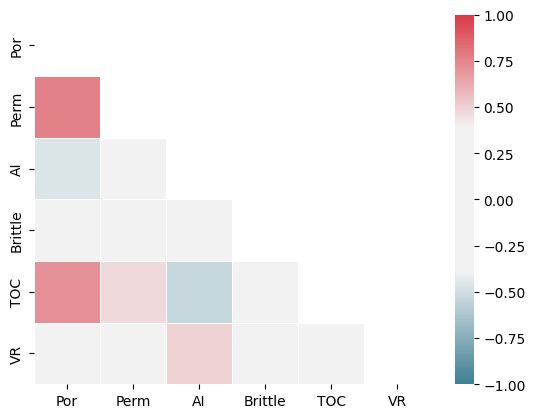

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)



- 선형회귀모형 시각화

In [ ]:
df = pd.read_csv("unconv_MV_v5.csv")
df.head(10)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


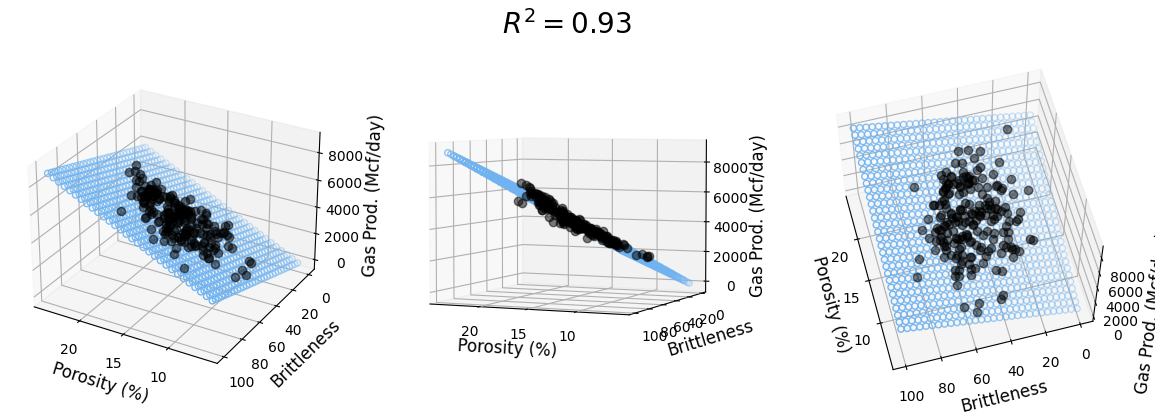

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#데이터 준비
X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#학습
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
r2 = model.score(X, Y)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#각도 조정
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)
fig.tight_layout()

- 다른 시각화

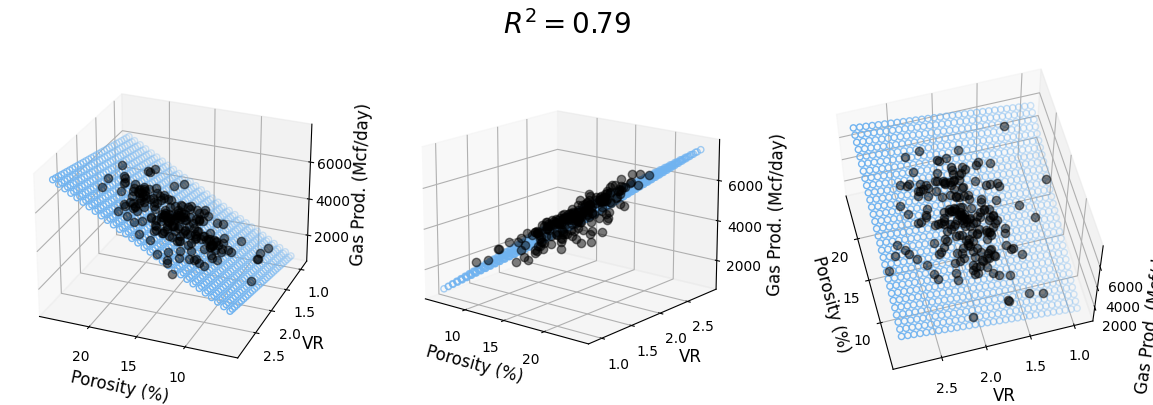

In [ ]:
X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#학습
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
r2 = model.score(X, Y)

#시각화

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
#Optional: GIF파일 생성
#for ii in np.arange(0, 360, 1):
#    ax.view_init(elev=32, azim=ii)
#    fig.savefig('gif_image%d.png' % ii)

#3. statmodels 사용

In [ ]:
import pandas as pd
df = pd.read_csv("unconv_MV_v5.csv")
df.head(10)

features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features]  #.values.reshape(-1, len(features))
y = df[target].values

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, X)    #OLS: Ordinary Least Square
result = model.fit()
print(result.summary())

# ---- summary 정리 ----

# R-squared == 결정계수 (0~1까지 )
#  - 직선이 얼마나 잘 설명하냐
#  - 문제점: x변수에 직선식에 필요없는 값들을 넣어주면 값이 높아진다.

# Adj. R-squared
# x변수가 많아진다해도 무작정 값이 높아지지 않는다.

# AIC (아카이케 인포메이션 크리테리아) == 정보량

# coef 계수값

# P>|t| 가 0.000 이면 0에 매우 가깝다.

# por = 0 이라는 귀무가설H0
# por <> 0 이라는 대립가설 H1

# por의 p-value가 매우 낮으니 h0는 틀렸다.
# so, 대립가설이 통계적으로 유의미하다.

# ---- ---- ---- ---- ----

# 1. Y ~ X1...X5 
# fitting을 해줄 때 변수를 소거해본다.
# 이 때, AIC값을 덜 해치는 변수를 뺀다.
# 이후 X1, X3, X4가 나오면 그걸 변수로 채택한다.
# --> 후진소거법

# 2. Y ~ 상수
# fitting을 할 때 변수를 하나씩 넣어본다.
# 이 떄, aic값이 많이 오르는 변수를 추가한다.
# --> 전진선택법

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          4.54e-127
Time:                        04:34:00   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1575.2735    119.064    -13.231      0.0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#df에서 X변수들간의 correlation을 체크
#por 변수와 함께, corr이 낮은 X 변수들을 선택
df.corr()
X = df[["Por", "AI", "Brittle"]]
y = df.Prod
#X 변수를 scaling
scaled = pd.DataFrame(StandardScaler().fit_transform( X), columns=["Por", "AI", "Brittle"])

#파티셔닝(7:3)
X_train, X_test, y_train, y_test = train_test_split( scaled, y, test_size=0.3)

import statsmodels.api as sm
X_train = sm.add_constant( X_train)

X_train

,const,Por,AI,Brittle
134,1.0,-0.729197,1.239950,-2.196804
132,1.0,-1.434387,0.638676,1.048528
78,1.0,-0.493009,-1.165145,1.372778
79,1.0,1.028717,-0.882192,0.664679
152,1.0,1.244661,-0.829139,-0.341416
...,...,...,...,...
112,1.0,1.096200,-0.210181,-0.257693
100,1.0,-0.185964,-1.112091,1.461467
84,1.0,-1.633460,0.002034,-0.542919
70,1.0,-1.640208,0.921629,1.108837


In [ ]:
#sm.OLS로 회귀모형을 model 만들고, 계수에 대한 p-value와 결정계수를 확인
model = sm.OLS( y_train, X_train)
print( model.fit().summary() )

                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     671.9
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.57e-81
Time:                        23:09:58   Log-Likelihood:                -974.20
No. Observations:                 140   AIC:                             1956.
Df Residuals:                     136   BIC:                             1968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4319.9866     21.859    197.626      0.0

In [ ]:
X = df[features]#.values.reshape(-1, len(features))
y = df[target].values
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          4.54e-127
Time:                        23:09:58   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1575.2735    119.064    -13.231      0.0

In [ ]:
train, test = train_test_split( df, test_size=0.3)

In [ ]:
import statsmodels.api as sm
reg = sm.OLS.from_formula("Prod ~ Por+Brittle+Perm+TOC", train).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     608.6
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.81e-85
Time:                        23:09:58   Log-Likelihood:                -958.07
No. Observations:                 140   AIC:                             1926.
Df Residuals:                     135   BIC:                             1941.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1522.8234    147.140    -10.350      0.0

In [ ]:
from statsmodels.formula.api import ols
model = ols(formula = "Prod ~ Por+Brittle+Perm+TOC",data = train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     608.6
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.81e-85
Time:                        23:09:58   Log-Likelihood:                -958.07
No. Observations:                 140   AIC:                             1926.
Df Residuals:                     135   BIC:                             1941.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1522.8234    147.140    -10.350      0.0

In [ ]:
model.predict( test[features] )

20     5424.713116
134    2540.299036
90     3669.500905
55     4025.472005
53     3716.208443
15     3433.323548
112    5077.974175
88     3307.056713
82     4298.957156
9      4438.641531
39     4641.423469
131    4953.136138
102    3343.254069
132    3259.535457
181    4003.139692
64     5536.016925
120    4789.219558
146    3969.451542
165    5127.338008
57     3775.252868
156    5504.578649
17     3897.105676
70     3165.286411
54     5430.267857
92     5353.738346
133    4820.238354
77     2906.042474
191    1993.362766
171    5408.435729
34     3613.395611
100    4648.447036
108    5995.389370
45     3459.982645
13     5450.302751
86     4239.238349
151    3072.418729
18     4870.197377
52     4430.393639
169    2845.662088
195    3972.317046
138    1841.630657
1      3496.153761
30     5395.195812
139    4172.071400
162    4370.798131
150    2835.396613
185    4788.000960
59     4124.452081
187    3366.366878
168    4993.308893
69     3771.416019
29     3633.785799
189    4307.

In [ ]:
test.Prod

20     5778.851488
134    2508.507049
90     3806.229207
55     4079.994302
53     3741.129167
15     3539.984263
112    5334.209437
88     3364.213781
82     4319.787412
9      4285.026122
39     4471.241364
131    5257.439724
102    3376.059883
132    3258.271193
181    4144.220800
64     5620.445827
120    4761.541276
146    4180.788056
165    5175.599120
57     3691.832452
156    5629.970179
17     3796.037029
70     3180.611366
54     5605.978153
92     4877.714730
133    4896.396900
77     3190.699612
191    2187.774422
171    5449.314018
34     3621.261108
100    4464.894985
108    6480.140811
45     3210.901380
13     5546.431951
86     4208.174933
151    3219.491990
18     4534.585915
52     4601.071319
169    2940.975811
195    3847.571003
138    2107.139414
1      3561.146205
30     5859.748328
139    3989.012964
162    3923.997348
150    2705.868622
185    4807.055830
59     3969.558019
187    3413.737390
168    4862.060183
69     3767.102420
29     3825.661812
189    4291.

In [ ]:
import numpy as np
pred = model.predict(test)
np.sqrt( np.mean( (pred-test.Prod)**2 ) ) #RMSE

200.89536308832044

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error( pred, test.Prod)

40358.946910388106

In [ ]:
# BostionHousing으로 imputing, scaling, partitioning
# statmodels를 이용해서 medv를 예측하는 회귀모형을 만듬
# test로 rmse를 계산

import pandas as pd
df = pd.read_csv('BostonHousing.csv')

import seaborn as sns
#sns.heatmap(df.corr(), cmap="Blues")
print(df.corr())

from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df[['rm','lstat','ptratio','indus', 'medv']], test_size = 0.2, random_state = 0)

from statsmodels.formula.api import ols
model = ols(formula = "medv ~ rm+lstat+ptratio+indus",data = x_train).fit()
print(model.summary())

np.sqrt(np.mean( (x_test.medv - model.predict(x_test))**2 ))


             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

6.478994236164007

- 변수 선택을 위한 변수 소거: Forward, Backward, Stepwise
- R을 사용 

#4. 머신러닝 회귀

In [ ]:
!pip install rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10667 sha256=6754ba47111d1b628f74a1b05598d9a95e05c6adcd71f875c3faab812f77ae20
  Stored in directory: /root/.cache/pip/wheels/d9/f2/53/6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('unconv_MV_v5.csv')
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

#전처리
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']



In [ ]:
#학습
dt = DecisionTreeRegressor().fit(X_train, y_train)
print( np.mean( (y_test - dt.predict(X_test))**2)  ) #MSE

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit( X_train[["Por", "Brittle", "Perm","TOC"]], y_train ) 
print( np.mean( (y_test - lr.predict(X_test[["Por", "Brittle", "Perm","TOC"]]))**2)  ) #MSE

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300).fit(X_train, y_train)
print( np.mean( (y_test - rf.predict(X_test))**2)  ) #MSE

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor().fit(X_train, y_train)
print( np.mean( (y_test - gbm.predict(X_test))**2)  ) #MSE


116594.92451157833
33251.812647840845
25520.365709169786
24088.072211939794


In [ ]:
# 보스턴하우징 데이터셋으로 회귀모형을 만든다
# target:medv, X: 나머지
# 위의 네가지 모형으로 회기를 만든다.

df = pd.read_csv('BostonHousing.csv')

#파티셔닝
#x_train, x_test, y_train, y_test = train_test_split(df[['rm','lstat','ptratio','indus']], df['medv'], test_size = 0.2)
x_train, x_test, y_train, y_test = train_test_split(df.drop('medv', axis=1), df['medv'], test_size = 0.2)

dt = DecisionTreeRegressor().fit(x_train, y_train)
print( np.sqrt(np.mean( (y_test - dt.predict(x_test))**2))  ) #RMSE

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit( x_train[['rm','lstat','ptratio','indus']], y_train ) 
print( np.sqrt(np.mean( (y_test - lr.predict(x_test[['rm','lstat','ptratio','indus']]))**2))  ) #RMSE

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300).fit(x_train, y_train)
print( np.sqrt(np.mean( (y_test - rf.predict(x_test))**2))  ) #RMSE

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor().fit(x_train, y_train)
print( np.sqrt(np.mean( (y_test - gbm.predict(x_test))**2))  ) #RMSE

3.8358474279089982
5.525000311801582
2.9990330587677274
3.0989157564632817


49290.65159161368


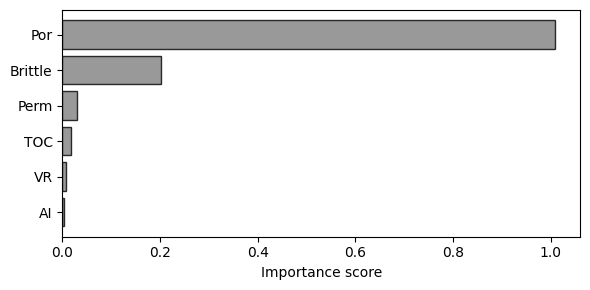

In [ ]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('unconv_MV_v5.csv')
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

#전처리
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

#학습

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

print( np.mean( (y_test - rf.predict(X_test))**2) )

#변수 중요도 및 시각화
imp = rfpimp.importances(rf, X_test, y_test)

fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
plt.gca().invert_yaxis()
fig.tight_layout()

In [ ]:
# pm_example 회귀분석
# target: ttf
# x변수중에서 1번 2번은 제외
# cycle은 optional
# 파티셔닝 해야함
# 성능은 rmse로
# 11,4,15,7, 12
#df = pd.read_csv('pm_example.csv')

df = pd.read_csv('pm_check.csv')

#결측치 없음 
df.isnull().sum()

#파티셔닝
#x_train, x_test, y_train, y_test = train_test_split(df[['rm','lstat','ptratio','indus']], df['medv'], test_size = 0.2)
x_train, x_test, y_train, y_test = train_test_split(df.drop(['id','cycle','ttf'], axis=1), df['ttf'], test_size = 0.3)
df.corr()

dt = DecisionTreeRegressor().fit(x_train, y_train)
print( np.sqrt(np.mean( (y_test - dt.predict(x_test))**2))  ) #RMSE

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit( x_train[['s11','s4','s15','s7','s12']], y_train ) 
print( np.sqrt(np.mean( (y_test - lr.predict(x_test[['s11','s4','s15','s7','s12']]))**2))  ) #RMSE

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300).fit(x_train, y_train)
print( np.sqrt(np.mean( (y_test - rf.predict(x_test))**2))  ) #RMSE

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor().fit(x_train, y_train)
print( np.sqrt(np.mean( (y_test - gbm.predict(x_test))**2))  ) #RMSE


38.41944975591995
46.865444289480976
26.718904627993922
32.876338756630346


# 5. Logistic Regression (로지스틱 회귀)


- 로지스틱 회귀는 다음과 같은 상황에서 사용할 수 있음
  1. binary target을 모델링하는 경우
  2. 예측 확률을 알고 싶은 경우
  3. **해석 가능한 모델**을 얻고자 하는 경우
  4. 클래스를 선형으로 분리 가능한 경우

## Assumptions
1. 관측치들 간 독립성: 데이터의 샘플들은 랜덤하게 얻어져야 함. (반복적 측정 X, 시간 및 공간에 따른 상관관계 X)
  - 본 실습에서 활용하는 타이타닉 데이터의 경우 개별 승객 기록으로 구성되므로 자동 충족
2. 잔차 간 등분산성: independent variables 간 다중공선성이 없어야 함.
3. 독립 변수와 log odds 간의 linearity
 - LHS = 0,1 / RHS = ax + bx^2 + ... (수치)  
 LHS가 0 또는 1뿐이니  
 1이 발생할 확률값 P / 0은 P-1로 대체  
 이 때, odds = P/(1-P)이고, log(odds)
 
4. 이상치가 존재하지 않아야 함
- 추가적으로, 적당한 수의 샘플이 존재해야 함.
- 또한, independent variables가 너무 많을 경우 일반화 성능이 감소할 수 있음.



- 다중 로지스틱 회귀모형의 일반적 형태
  - $\log(\frac{π(x)}{1-π(x)})=α+β_1x_1+\cdots+\beta_kx_k$
  - where $π(x)=P(Y=1|x), x=(x_1, \cdots, x_k)$
  - $π(x)$는 다음과 같이 재표현할 수 있음
    - $π(x)=\frac{exp(α+β_1x_1+\cdots+\beta_kx_k)}{1+exp(\alpha+\beta_1x_1+\cdots+\beta_kx_k)}=\frac{1}{1+exp\{-(\alpha+\beta_1x_1+\cdots+\beta_kx_k)\}}$
    - 따라서 sigmoid ($s(z)=\frac{1}{1+e^{-z}}$)와 동일한 형태 (더 자세한 설명 )

> ## Sigmoid (Logit) Function
- predicted response variable은 0과 1 사이의 확률 값
  - sigmoid function을 사용하면 실수 값을 0과 1 사이의 확률 값으로 표현

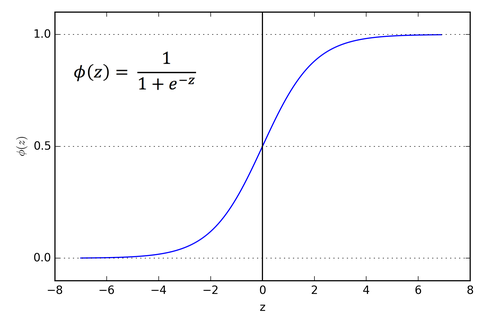

- sigmoid function을 통해 0과 1의 함수로 나타내기 위해 Decision Boundary (threshold)를 설정해줌
  - 해당 threshold를 넘을 경우 class 1, 그렇지 않은 경우 class 0으로 분류
- 예를 들어, threshold를 0.5로 설정하는 경우
  - if p ≥ 0.5, then class = 1
  - if p < 0.5, then class = 0

## Step 1. Data Preprocessing

- dataset: [titanic dataset](https://www.kaggle.com/c/titanic/data) from kaggle

In [ ]:
import pandas as pd
passengers = pd.read_csv("titanic_passengers.csv")

In [ ]:
passengers.shape # (행, 열)

(891, 12)

In [ ]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
passengers.isnull().sum() # 결측치: (Age 177명, Cabin 687명, Embarked 2명)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 불필요한 컬럼 제거
  - 'Cabin': 891명 중 687명(77.1%)이 결측치이므로, 해당 열 제거
  - 'Ticket', 'Passengerid': 큰 의미가 없으므로, 해당 열 제거
  - 본 실습에서는 편의상 'SibSp' (동반한 형제자매, 배우자수)와 'Parch'(동반한 부모, 자식 수)도 제거


In [ ]:
passengers.drop(['Cabin', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [ ]:
passengers.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [ ]:
passengers.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


- 파생변수 생성
  - Name에서 Title 추출

In [ ]:
# Name에서 Title만 떼어내기
for passenger in [passengers.copy()]:
    passenger['Title'] = passenger['Name'].str.extract('([A-za-z]+)\.', expand=False) # 알파벳 + '.'으로 된 부분 추출

In [ ]:
passenger["Title"].value_counts() # Mr, Miss, Mrs, others로 구분하는게 편리할 것으로 보임

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
title_mapping = {k: 'others' for k in set(passenger['Title'].unique()) - set(['Mr', 'Mrs', 'Miss'])}
print(title_mapping)

{'Master': 'others', 'Major': 'others', 'Mlle': 'others', 'Mme': 'others', 'Lady': 'others', 'Col': 'others', 'Don': 'others', 'Jonkheer': 'others', 'Capt': 'others', 'Rev': 'others', 'Dr': 'others', 'Sir': 'others', 'Ms': 'others', 'Countess': 'others'}


In [ ]:
for passenger in [passenger.copy()]:
    passenger['Title'] = passenger['Title'].apply(lambda x: title_mapping[x] if x not in ['Mr', 'Mrs', 'Miss'] else x)

In [ ]:
passenger["Title"].value_counts() # Mr, Miss, Mrs, others로 구분하는게 편리할 것으로 보임

Mr        517
Miss      182
Mrs       125
others     67
Name: Title, dtype: int64

In [ ]:
# 불필요한 Name 열 제거
passenger.drop(['Name'], axis = 1, inplace = True)

In [ ]:
passenger.isnull().sum() # 결측치 확인: (Age 177명, Embarked 2명)

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Title         0
dtype: int64

- 결측치 처리 : Age(177명)와 Embarked(2명)

In [ ]:
# 'Embarked'에서 NA가 2개뿐 & 대부분(72.4%)이 'S'이므로, 결측치들도 S로 "대체"
passenger = passenger.fillna({"Embarked": "S"})

In [ ]:
# 'Age'를 각 'Title'에 대한 Age값의 중간값(median) 으로 채운다
passenger['Age'].fillna(passenger.groupby('Title')['Age'].transform('median'), inplace=True)

In [ ]:
passenger.isnull().sum() # 결측치 확인: (Age 177명, Embarked 2명)

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
dtype: int64

## Step 2. EDA

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


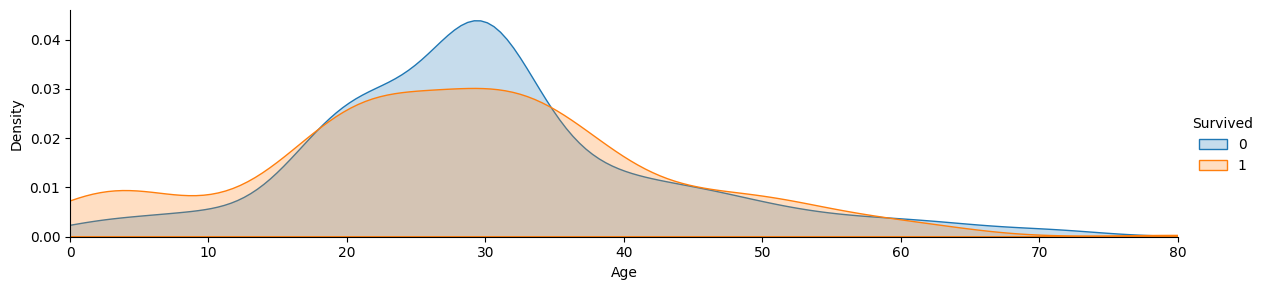

In [ ]:
# Age(나이)에 따른 survived (0: 사망, 1: 생존)비교

import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(passenger, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, passenger['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

# 생존 유무를 통해 Age를 (~10대, 10대, 20대, 30대, 40~50대, 60대 이상)으로 6가지 category로 구분해보자 

- Age 변수 범주화
  - ~10대, 10대, 20대, 30대, 4-50대, 60대 이상으로 구분

In [ ]:
passenger.loc[passenger['Age'] < 10, 'Age'] = 0
passenger.loc[(passenger['Age'] >= 10) & (passenger['Age'] < 20), 'Age'] = 1 # 10대
passenger.loc[(passenger['Age'] >= 20) & (passenger['Age'] < 30), 'Age'] = 2 # 20대
passenger.loc[(passenger['Age'] >= 30) & (passenger['Age'] < 40), 'Age'] = 3 # 30대
passenger.loc[(passenger['Age'] >= 40) & (passenger['Age'] < 60), 'Age'] = 4 # 40-50대
passenger.loc[(passenger['Age'] >= 60), 'Age'] = 5 # 60대 이상
passenger['Age'] = passenger['Age'].apply(int)

In [ ]:
passenger["Age"].value_counts()

3    303
2    256
4    137
1    102
0     67
5     26
Name: Age, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


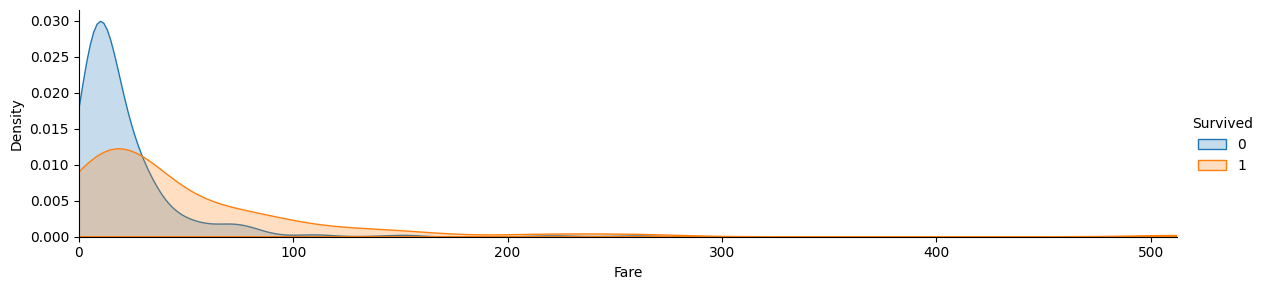

In [ ]:
# Fare에 따른 survived 차이
facet2 = sns.FacetGrid(passenger, hue="Survived", aspect=4)
facet2.map(sns.kdeplot, 'Fare', shade=True)
facet2.set(xlim=(0, passenger['Fare'].max()))
facet2.add_legend()

plt.show() # 운임요금이 낮으면 사망률이 높다.

In [ ]:
passenger['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

- Fare이 일정 수준 이상인 경우 같은 값으로 통일

In [ ]:
passenger.loc[passenger['Fare'] >= 150, 'Fare'] = 150

In [ ]:
# 특정 feature에 따른 survived 비교 (0: 사망, 1: 생존) 함수
def bar_chart(feature):
    survived = passenger[passenger['Survived']==1][feature].value_counts()
    dead = passenger[passenger['Survived']==0][feature].value_counts()
    df_survived = pd.DataFrame([survived,dead])
    df_survived.index = ['Survived','Dead']
    df_survived.plot(kind='bar',stacked=True, figsize=(10,5))

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

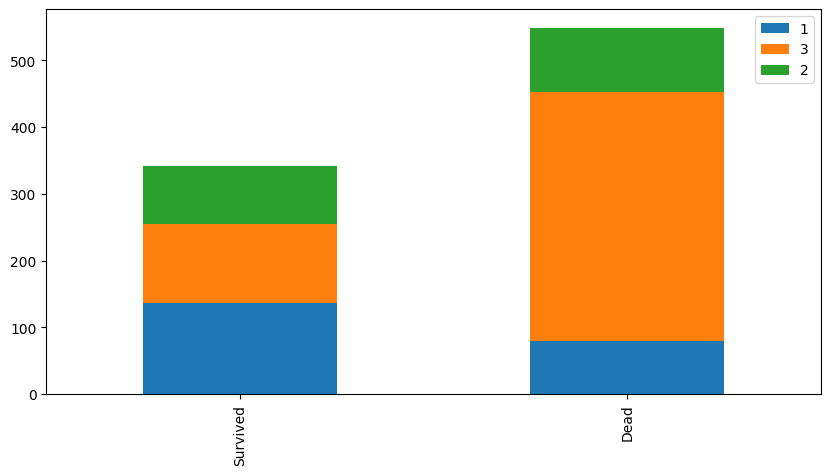

In [ ]:
# Pclass에 따른 survived 차이
bar_chart('Pclass') # 1등석일수록 생존하고, 3등석일수록 사망 (1: 1등석, 2: 2등석, 3: 3등석)
passenger.groupby(['Pclass'])['Survived'].agg(lambda x: x.sum()/x.count()) # survived 확률

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

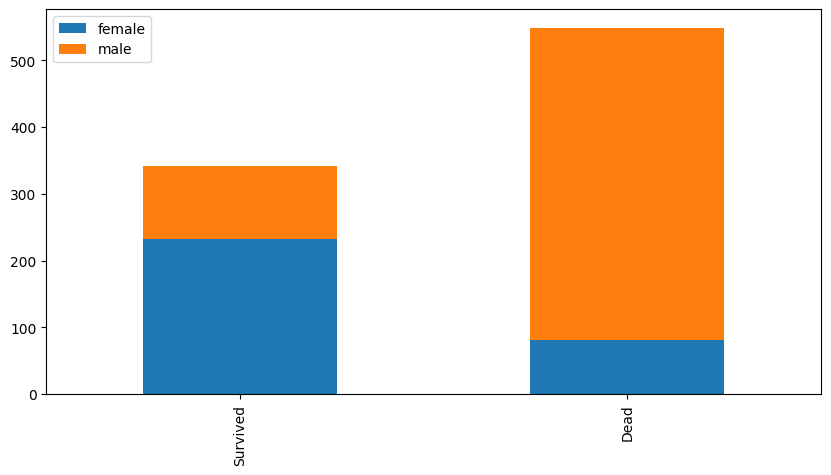

In [ ]:
# Sex에 따른 survived 차이
bar_chart('Sex') # 여성의 생존률이 높다.
passenger.groupby(['Sex'])['Survived'].agg(lambda x: x.sum()/x.count()) # survived 확률

Title
Miss      0.697802
Mr        0.156673
Mrs       0.792000
others    0.522388
Name: Survived, dtype: float64

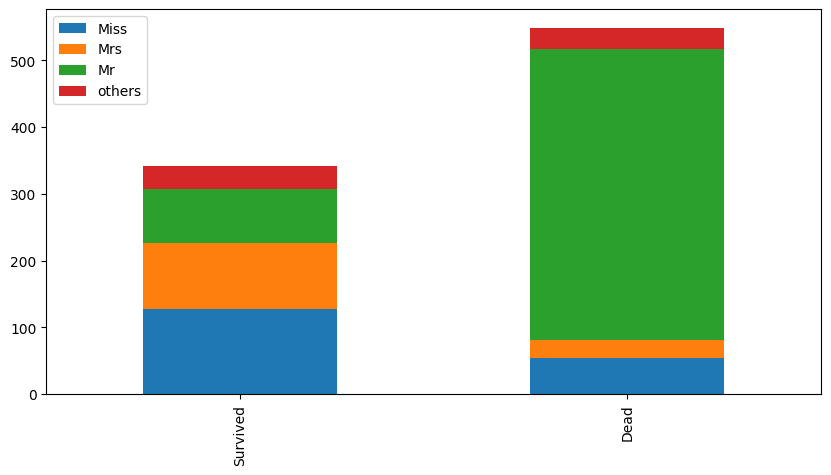

In [ ]:
# Title에 따른 survived 차이
bar_chart('Title') # 남성(Mr)의 사망률이 높다.
passenger.groupby(['Title'])['Survived'].agg(lambda x: x.sum()/x.count()) # survived 확률

Age
0    0.597015
1    0.401961
2    0.386719
3    0.333333
4    0.394161
5    0.269231
Name: Survived, dtype: float64

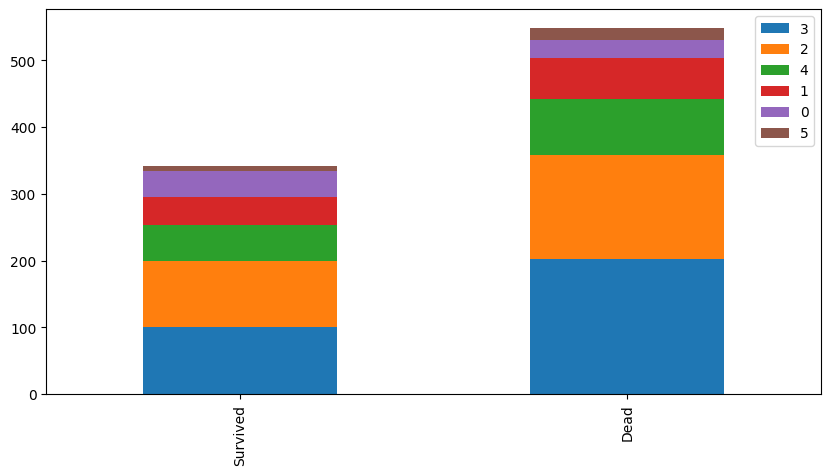

In [ ]:
# Age에 따른 survived 차이
bar_chart('Age') # 60대 이상이 확실히 사망률이 높다.
passenger.groupby(['Age'])['Survived'].agg(lambda x: x.sum()/x.count()) # survived 확률

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

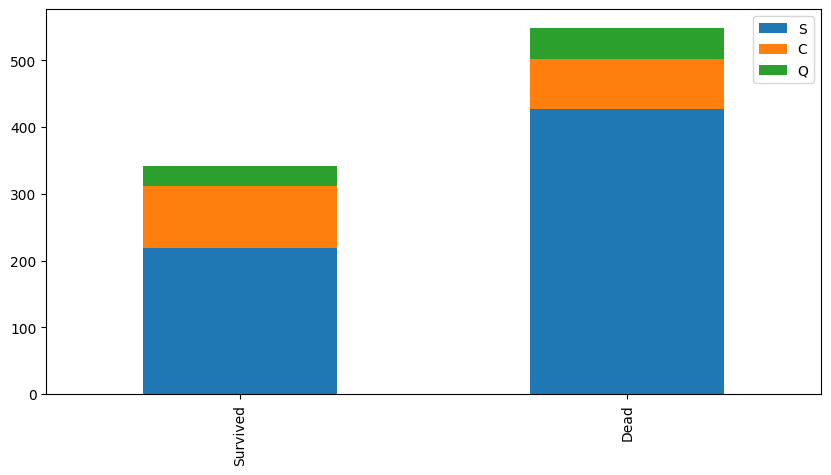

In [ ]:
# Embarked에 따른 survived 차이
bar_chart('Embarked') # C : Cherbourg, Q : Queenstown, S : Southampton; C일 때 생존 확률이 가장 높음
passenger.groupby(['Embarked'])['Survived'].agg(lambda x: x.sum()/x.count()) # survived 확률

In [ ]:
# 유의미하다고 생각되는 column 선택. 실습에서는 임의로 4개 선택 (x = 승선권클래스 Pclass, 성별 Sex, 운임요금 Fare, y = 생존여부 Survived)
passenger = passenger[['Pclass', 'Sex', 'Fare', 'Survived']]

In [ ]:
passenger = pd.get_dummies(passenger, columns = ['Sex', 'Pclass'], drop_first=True) # 두 변수 간 correaltion =1이 되는 것을 방지

In [ ]:
passenger.columns

Index(['Fare', 'Survived', 'Sex_male', 'Pclass_2', 'Pclass_3'], dtype='object')

- 다중공선성 확인
  - 5를 초과하는 값이 없으므로 문제 없음

In [ ]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(passenger)

,variables,VIF
0,Fare,1.861677
1,Survived,1.932878
2,Sex_male,2.651798
3,Pclass_2,1.479735
4,Pclass_3,2.235163


## Step 3. Logistic Regression 
- 설명이 용이함
  - 오즈(odds; $\frac{p}{1-p}$)의 관점에서 해석될 수 있음 (실패에 비해 성공할 확률의 비)
  - $exp(\beta_1)$: 나머지 변수$(x_2,\cdots,x_k)$가 주어질 때 $x_1$이 한 단위 증가할 때마다 성공(Y)의 오즈가 몇 배 증가하는지를 나타내는 값
- 좋은 성능을 기대하기 어려울 수도 있음
- `statsmodel`, `sklearn`
  - `statsmodel`: p-value 등 모델에 대한 summary 정보 제공

In [ ]:
train_features = passenger[['Pclass_2', 'Pclass_3', 'Sex_male', 'Fare']]
train_target = passenger['Survived']
train_target = train_target.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, train_target, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312, stratify=y_train)
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (569, 4)
valid set: (143, 4)
test set: (179, 4)


In [ ]:
y_train.value_counts() # 0: 사망, 1: 생존

0    361
1    208
Name: Survived, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
x_train, y_train = RandomUnderSampler(random_state=312, sampling_strategy='majority').fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts() # 0: 사망, 1: 생존

0    208
1    208
Name: Survived, dtype: int64

In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_valid = sm.add_constant(x_valid)
x_test = sm.add_constant(x_test)

In [ ]:
model_sm = sm.Logit(y_train, x_train).fit()
# model_sm = smf.logit("y 변수명 ~ X변수1 + X변수2", data=데이터프레임).fit()의 형태로도 fit 가능

Optimization terminated successfully.
         Current function value: 0.484719
         Iterations 6


## Step 4. Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Probability 값
predict_prob = model_sm.predict(x_valid)

- logit linearity 확인

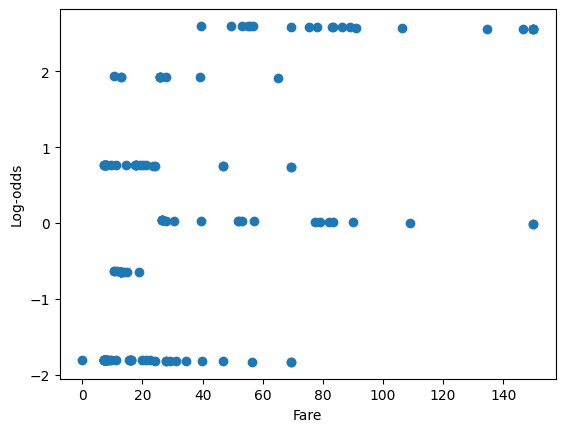

In [ ]:
import numpy as np
# Getting log odds values
log_odds = np.log(predict_prob / (1 - predict_prob))

# Visualize predictor variable vs logit values for Age
plt.scatter(x=x_valid['Fare'].values, y=log_odds)
plt.xlabel("Fare")
plt.ylabel("Log-odds")
plt.show()

- 해당 실습에서는 비선형 패턴을 보여주므로 로짓 선형성 가정이 위반됨 (polynomial terms 등 고차 다항식 항을 통합하여 변환을 수행할 수 있음.)

- cut-off 설정

In [ ]:
# 경계값cut off value에 따라 0,1 값 변환
def change_cutoff(pred_prob_y, cutoff):
    Y_change = pred_prob_y.copy()
    Y_change[Y_change > cutoff] = 1
    Y_change[Y_change <= cutoff] = 0
    return(Y_change.astype(int))

In [ ]:
print(confusion_matrix(y_valid, change_cutoff(predict_prob, 0.5)))
print(" Accuracy:", accuracy_score(y_valid, change_cutoff(predict_prob, 0.5)))
print("Precision:", precision_score(y_valid, change_cutoff(predict_prob, 0.5)))
print("   Recall:", recall_score(y_valid, change_cutoff(predict_prob, 0.5)))
print(" F1 score:", f1_score(y_valid, change_cutoff(predict_prob, 0.5)))

[[60 31]
 [10 42]]
 Accuracy: 0.7132867132867133
Precision: 0.5753424657534246
   Recall: 0.8076923076923077
 F1 score: 0.672


In [ ]:
print(confusion_matrix(y_valid, change_cutoff(predict_prob, 0.7)))
print(" Accuracy:", accuracy_score(y_valid, change_cutoff(predict_prob, 0.7)))
print("Precision:", precision_score(y_valid, change_cutoff(predict_prob, 0.7)))
print("   Recall:", recall_score(y_valid, change_cutoff(predict_prob, 0.7)))
print(" F1 score:", f1_score(y_valid, change_cutoff(predict_prob, 0.7)))

[[90  1]
 [22 30]]
 Accuracy: 0.8391608391608392
Precision: 0.967741935483871
   Recall: 0.5769230769230769
 F1 score: 0.7228915662650601


- ROC curve: 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 그래프
  - TPR: true positive rate
  - FPR: false positive rate
  - 좌측 상단으로 붙어있는 경우 좋은 분류기

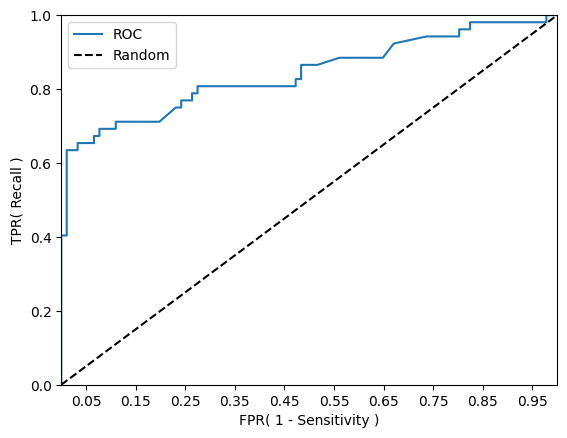

In [ ]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1) # 임곗값에 따른 FPR, TPR 값을 반환 받음. 

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  
roc_curve_plot(y_valid, predict_prob)

## Step 5. Interpretation
- [Deviance]
  - saturated model: 연구모형이 해당 데이터에 대해 완전히 적합된 모형으로, 추정해야할 모수가 전체 변수의 수와 동일
  - null model: 절편항만 가지고 X 변수 어떤것도 모델에 반영되지 않는 경우(Y=b_0)로, 추정할 모수가 1개
  - fitted model: p개의 모수+절편항을 포함하는 모형이므로 추정할 모수가 p+1개
  - **residual deviance**: 2{LL(saturated model) - LL(fitted model)}, df=n-(p+1)
  - **null deviance**: 2{LL(saturated model) - LL(null model)}, df=n-1
  - 두 deviance는 값이 작을수록 해당 모형이 자료를 잘 적합함을 의미
  - 영모형과 제안모형 간의 비교(검정)는 (Null Deviance - Proposed Deviance)가 근사적으로 자유도가 (n-(p+1))-(n-1)=p인 카이제곱분포를 따른다는 사실에 기초


In [ ]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  416
Model:                          Logit   Df Residuals:                      411
Method:                           MLE   Df Model:                            4
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.3007
Time:                        23:10:10   Log-Likelihood:                -201.64
converged:                       True   LL-Null:                       -288.35
Covariance Type:            nonrobust   LLR p-value:                 1.937e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6136      0.518      5.047      0.000       1.599       3.629
Pclass_2      -0.6780      0.445     -1.522      0.128      -1.551       0.195
Pclass_3      -1.8453      0.442     -4.179      0.000      -2.711      -0.980
Sex_male      -2.5684      0.262     -9.806      0.000      -3.082      -2.055
Fare          -0.0004      0.006     -0.074      0.941      -0.011       0.010
==============================================================================
"""

In [ ]:
model_sm.summary2() # Pseudo R-squared == 대략

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.301     
Dependent Variable: Survived         AIC:              413.2864  
Date:               2023-04-23 23:10 BIC:              433.4398  
No. Observations:   416              Log-Likelihood:   -201.64   
Df Model:           4                LL-Null:          -288.35   
Df Residuals:       411              LLR p-value:      1.9368e-36
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          2.6136    0.5179   5.0471  0.0000   1.5987   3.6286
Pclass_2      -0.6780    0.4455  -1.5219  0.1280  -1.5511   0.1951
Pclass_3      -1.8453    0.4416  -4.1792  0.0000  -2.7108  -0.9799
Sex_male      -2.5684    0.2619  -9.8061  0.0000  -3.0818  -2.0551
Fare          -0.0004    0.0055  -0.0742  0.9408  -0.0113   0.0104
=================================================================

"""

- reference: (Pclass = 1, Sex = Female)
- Logit(Survived = 1) = 2.3366 - 0.5752 \* Pclass_2 - 1.6881 \*Pclass_3 - 2.5854 \* Sex_Male + 0.0073 \* Fare
- p-value가 유의수준 0.05 이하인 변수: Pclass_3, Sex_male

- 이 외 기타 항목들에 대한 해석 [참고1](https://investigate.ai/regression/evaluating-logistic-regressions/), [참고2](https://stackoverflow.com/questions/46700258/python-how-to-interpret-the-result-of-logistic-regression-by-sm-logit)

In [ ]:
# Odds ratio
import numpy as np
np.exp(model_sm.params) # reference: (Pclass = 1, Sex = Female)

const       13.648523
Pclass_2     0.507646
Pclass_3     0.157972
Sex_male     0.076655
Fare         0.999589
dtype: float64

- Pclass_3을 이용하는 승객은 Pclass_1을 이용하는 승객보다 odds가 0.184배 증가. (즉, odds가 약 81.6% 감소)
- 성별이 male인 승객은 femalie인 승객보다 odds가 0.075배 증가. (즉, odds가 약 92.5% 감소)

## 6. Appendices

## Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e9)
model.fit(x_train, y_train)

LogisticRegression(C=1000000000.0)

In [ ]:
print(model.intercept_) 
print(model.coef_)

## reference: (Pclass=1, Sex=Female)

[1.30682024]
[[ 1.30682024e+00 -6.77969790e-01 -1.84533864e+00 -2.56844346e+00
  -4.11293881e-04]]


In [ ]:
print(model.predict_proba(x_train)[:5]) # 0=사망, 1=생존 : 각 관측치별..[0(사망)일 확률, 1(생존)일 확률]

[[0.65432827 0.34567173]
 [0.85856869 0.14143131]
 [0.85851874 0.14148126]
 [0.49404785 0.50595215]
 [0.85856869 0.14143131]]


## K-fold CV
- hold-out: train/validation/test set을 split

- cross validation: 데이터셋을 k개의 subset으로 구분 후 k-1개의 subset을 train을 위해, 나머지 하나의 subset을 test를 위해 사용
  - 일반적으로 K=10을 사용하나, 데이터셋이 클 경우 계산 속도를 고려하여 k의 값을 줄이기도 함
  - 데이터셋이 많지 않을 경우 여러 번 샘플링하여 검증하는 과정을 거칠 수 있음
- cross validation을 사용할 경우 imbalanced data에 민감할 수 있음
  - class가 유사한 경우 `from sklearn.model_selection import KFold`을 통해 일반적인 kfold 사용
  - imbalanced인 경우 `from sklearn.model_selection import StratifiedKFold`을 통해 class의 수를 고려하여 kfold cv를 진행

- 여기서부터는 `sklearn`의 `LogitRegression` 활용

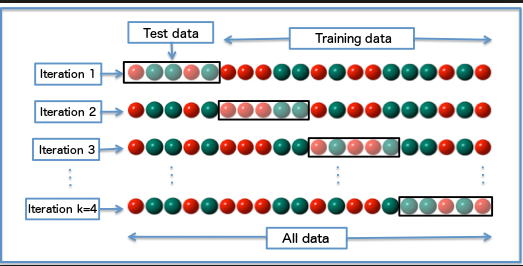

In [ ]:
from sklearn.model_selection import cross_validate
# from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# kfold = KFold(n_splits=10, shuffle=True, random_state=312) # K-Fold 객체 생성
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=312) # stratified K-Fold 객체 생성


In [ ]:
from sklearn.linear_model import LogisticRegression
model_cv = LogisticRegression()
#penalty: 'l1', 'l2', 'elasticnet', 'none' (default: l2)
#fit_intercept: True, False (default: True)


In [ ]:
# Stratified k-fold CV
# Accuracy 기준: cross_val_score(model, featrues, target, cross validation)
scores = cross_validate(model_cv, train_features, train_target, cv=kfold, # (model, featrues, target, cross validation)
                        scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc']) 
{k: np.mean(v) for k, v in scores.items()}

{'fit_time': 0.03378331661224365,
 'score_time': 0.03219313621520996,
 'test_accuracy': 0.7845443196004994,
 'test_recall': 0.684453781512605,
 'test_precision': 0.7414851849012832,
 'test_f1': 0.7089483170254843,
 'test_roc_auc': 0.8393844891491951}

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_cv, train_features, train_target, cv=kfold)

## Types of Logistic Regression 
- target variable에 따라 3가지로 구분할 수 있음
1. **Binary Logistic Regression**
  - target variable: 두 개의 categories
  - e.g., yes or no, good or bad, true or false, spam or no spam and pass or fail.

2. Multinomial Logistic Regression
  - target variable: 세 개 이상의 nominal (순서가 없는) categories
  - e.g., apple, mango, orange and banana.

3. Ordinal Logistic Regression
  - target variable: 세 개 이상의 ordinal categories
  - e.g., poor, average, good and excellent.